# Описательная статистика "MyAnimeList Dataset"

Студент: Самощенков Алексей Алексеевич К3243

Источник: https://www.kaggle.com/azathoth42/myanimelist

В первую очередь мне интересен набор данных о пользователях сайта, поэтому в рамках этой лабораторной работы я буду рассматривать только его.


## Загрузка набора данных, описание исходных данных и их предобработка

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [305]:
users_df = pd.read_csv('UserList.csv')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302675 entries, 0 to 302674
Data columns (total 17 columns):
username                    302674 non-null object
user_id                     302675 non-null int64
user_watching               302675 non-null int64
user_completed              302675 non-null int64
user_onhold                 302675 non-null int64
user_dropped                302675 non-null int64
user_plantowatch            302675 non-null int64
user_days_spent_watching    302675 non-null float64
gender                      217800 non-null object
location                    156774 non-null object
birth_date                  168749 non-null object
access_rank                 0 non-null float64
join_date                   302546 non-null object
last_online                 302546 non-null object
stats_mean_score            302546 non-null float64
stats_rewatched             302546 non-null float64
stats_episodes              302546 non-null float64
dtypes: float64(5), int64(6)

In [306]:
users_df.isnull().sum()

username                         1
user_id                          0
user_watching                    0
user_completed                   0
user_onhold                      0
user_dropped                     0
user_plantowatch                 0
user_days_spent_watching         0
gender                       84875
location                    145901
birth_date                  133926
access_rank                 302675
join_date                      129
last_online                    129
stats_mean_score               129
stats_rewatched                129
stats_episodes                 129
dtype: int64

In [307]:
users_df.drop(['last_online'], axis=1, inplace=True)
users_df.drop(['access_rank'], axis=1, inplace=True)
users_df['username'].fillna(value='No Data', inplace=True)
users_df['gender'].fillna(value='No Data', inplace=True)
users_df['location'].fillna(value='No Data', inplace=True)
users_df['birth_date'].fillna(value='No Data', inplace=True)
users_df['join_date'].fillna(value='No Data', inplace=True)
users_df['stats_mean_score'].fillna(value = np.average(users_df['stats_mean_score'].fillna(value=0)), inplace = True)
users_df['stats_rewatched'].fillna(value = np.average(users_df['stats_rewatched'].fillna(value=0)), inplace = True)
users_df['stats_episodes'].fillna(value = np.average(users_df['stats_episodes'].fillna(value=0)), inplace = True)

In [308]:
users_df.isnull().sum()

username                    0
user_id                     0
user_watching               0
user_completed              0
user_onhold                 0
user_dropped                0
user_plantowatch            0
user_days_spent_watching    0
gender                      0
location                    0
birth_date                  0
join_date                   0
stats_mean_score            0
stats_rewatched             0
stats_episodes              0
dtype: int64

## Описательная статистика

In [309]:
users_df.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes
count,3.026750e+05,302675.000000,302675.000000,302675.000000,302675.000000,302675.000000,3.026750e+05,302675.000000,302675.000000,3.026750e+05
mean,2.061401e+06,13.400007,166.638289,9.861796,10.550366,64.040430,6.907645e+01,7.120474,10.375458,4.846287e+03
std,2.118037e+06,34.747045,239.359931,34.270394,43.119854,157.485891,4.741020e+03,2.573903,44.230238,4.472857e+05
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.322455e+05,2.000000,28.000000,0.000000,0.000000,2.000000,1.363000e+01,7.090000,0.000000,8.170000e+02
50%,1.167583e+06,6.000000,96.000000,2.000000,2.000000,20.000000,3.958000e+01,7.800000,0.000000,2.386000e+03
75%,3.883446e+06,14.000000,217.000000,10.000000,10.000000,68.000000,7.994000e+01,8.440000,6.000000,4.847000e+03
max,7.273306e+06,6370.000000,11536.000000,9729.000000,10823.000000,12051.000000,2.601351e+06,10.000000,9404.000000,2.437949e+08


In [310]:
print(users_df[users_df['gender'] == 'Male']['gender'].count())
print(users_df[users_df['gender'] == 'Female']['gender'].count())
print(users_df[users_df['gender'] == 'No Data']['gender'].count())
print(users_df[users_df['gender'] == 'Non-Binary']['gender'].count())

135181
81374
84875
1245


### Гендерный вопрос

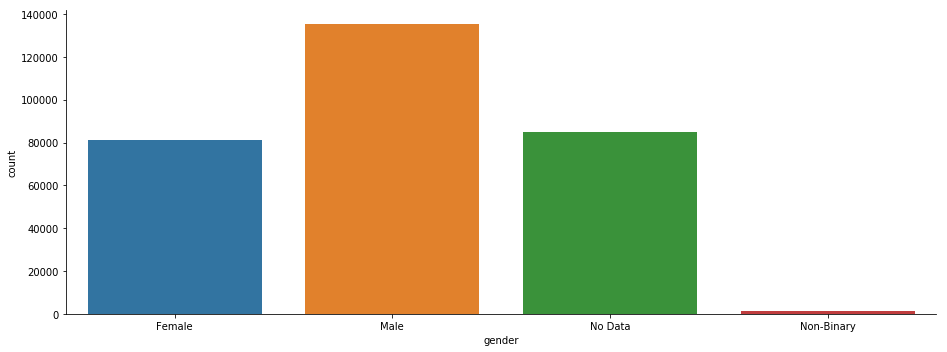

In [311]:
sns.catplot('gender', data=users_df, kind='count').fig.set_size_inches(15,5);

In [312]:
users_df['birth_date'] = pd.to_datetime(users_df['birth_date'], errors = 'coerce')
users_df=users_df[users_df.birth_date.notnull()]

users_df['join_date'] = pd.to_datetime(users_df['join_date'], errors = 'coerce')
users_df=users_df[users_df.join_date.notnull()]

birth_date = users_df.birth_date
join_date = users_df.join_date
gender = users_df.gender
spent = users_df.user_days_spent_watching

time = []
for i in join_date:
    time.append(round((datetime.datetime.now()-i).days/365.25,1))
 
age = []
for each in birth_date:
    age.append(round((datetime.datetime.now()-each).days/365.25,1))

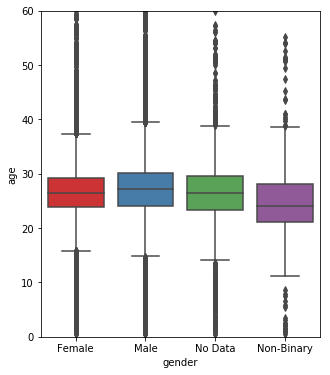

In [313]:
age_dict = {'gender':gender,'age':age,'spent':spent}
time_dict = {'gender':gender,'age':age,'spent':spent,'time':time}
time_df = pd.DataFrame(time_dict,columns=['gender','age','spent','time'])

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5, 6))
sns.boxplot(x="gender", y="age", data=time_df, palette="Set1", ax=ax)
ax.set_ylim([0, 60])
plt.show()

In [314]:
time_df.head()

,gender,age,spent,time
0,Female,30.2,55.31,7.3
1,Female,25.5,118.07,7.5
2,Male,28.9,83.70,12.4
3,Male,29.5,167.16,10.8
5,Female,21.8,15.20,10.1


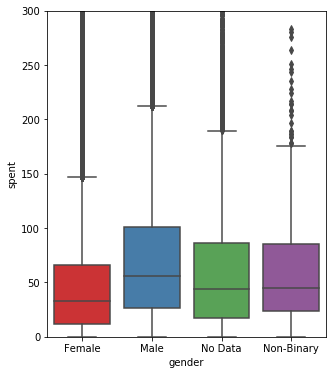

In [315]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5, 6))
sns.boxplot(x="gender", y="spent", data=time_df, palette="Set1", ax=ax)
ax.set_ylim([0, 300])
plt.show()

In [316]:
time_df.drop(time_df[time_df.spent>1000].index, inplace=True)
time_df.drop(time_df[time_df.age>80].index, inplace=True)
time_df.drop(time_df[time_df.age<0].index, inplace=True)

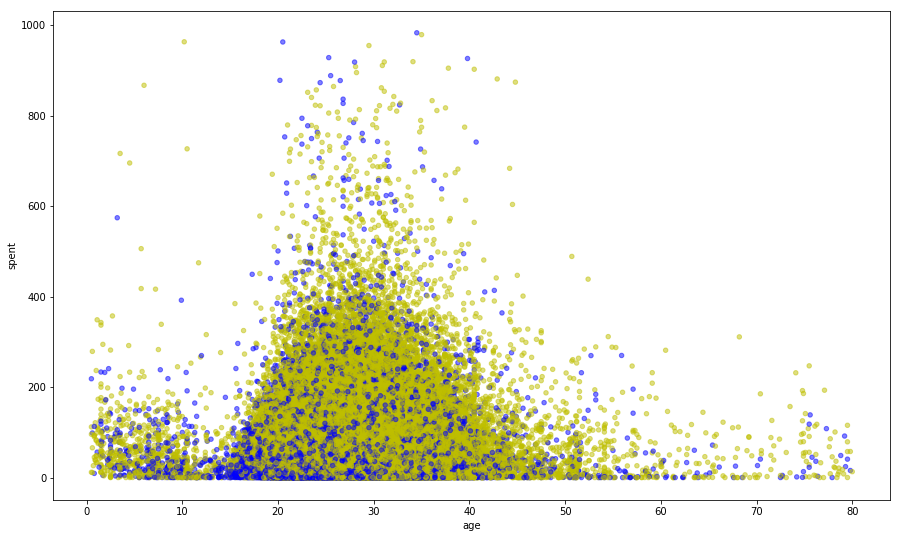

In [317]:
time_df.plot(kind='scatter', x='age', y='spent', alpha=0.5, figsize = (15,9),
                     color=["b" if each =="Female" else "y" for each in time_df.gender])
plt.show()

In [318]:
bins = [0, 12, 18, 32, 50, 100]
time_df['age_group']=pd.cut(time_df.age, bins)
pd.get_dummies(time_df['age_group'], dtype="uint8").head(5)
        

   (0, 12]  (12, 18]  (18, 32]  (32, 50]  (50, 100]
0        0         0         1         0          0
1        0         0         1         0          0
2        0         0         1         0          0
3        0         0         1         0          0
5        0         0         1         0          0

In [319]:
time_df['age_group'].head(5)

0    (18, 32]
1    (18, 32]
2    (18, 32]
3    (18, 32]
5    (18, 32]
Name: age_group, dtype: category
Categories (5, interval[int64]): [(0, 12] < (12, 18] < (18, 32] < (32, 50] < (50, 100]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5096E36D8>,
      dtype=object)

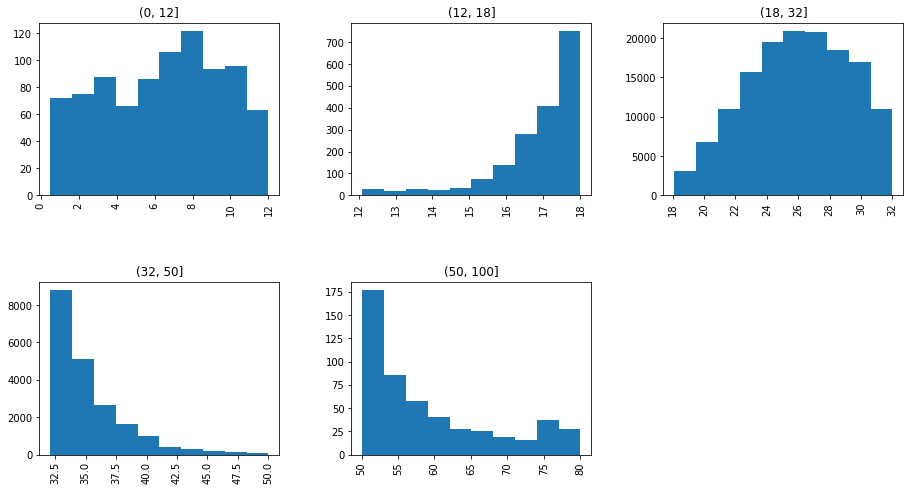

In [320]:
time_df.hist('age', by='age_group', layout=[2,3], figsize=[15,8])

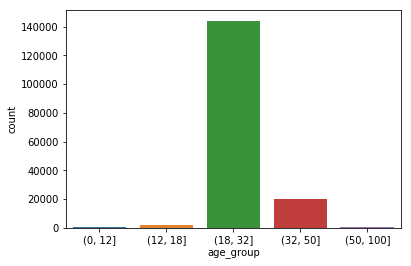

In [321]:
sns.countplot('age_group', data=time_df)

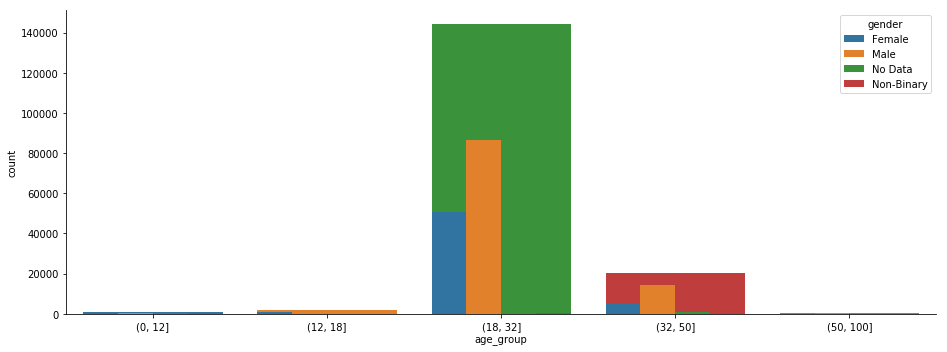

In [322]:
sns.catplot('age_group', data=time_df, kind='count').fig.set_size_inches(15,5);
sns.countplot(x='age_group', hue='gender', data=time_df)

Взрослые люди редко заполняют профиль на сайте, поэтому большая часть реальной аудитории бесполая.

Люди в возрастном диапазоне от 32 до 50 по большей части небинарны, что говорит о том, что не только пол не соответствует действительности, но и возраст.

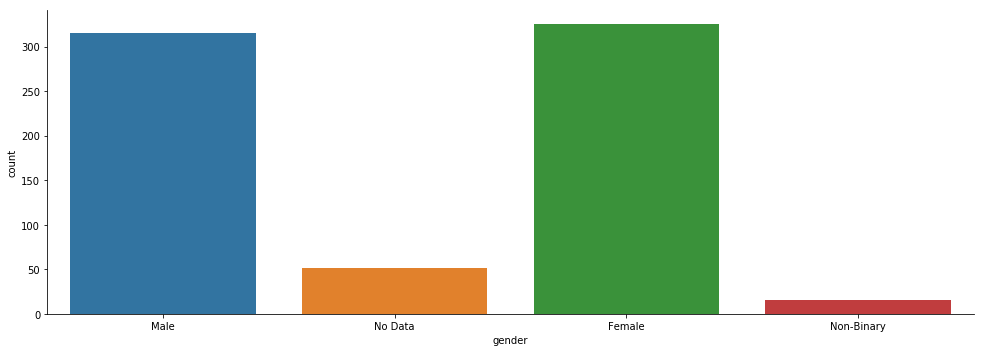

In [345]:
time_df.drop(time_df[time_df.age>17].index, inplace=True)
time_df.drop(time_df[time_df.age<13].index, inplace=True)
sns.catplot('gender', data=time_df, kind='count').fig.set_size_inches(15,5);

In [346]:
print(time_df[time_df['gender'] == 'Male']['gender'].count())
print(time_df[time_df['gender'] == 'Female']['gender'].count())
print(time_df[time_df['gender'] == 'No Data']['gender'].count())
print(time_df[time_df['gender'] == 'Non-Binary']['gender'].count())

315
325
51
16


Scatterplot навёл меня на мысль о том, что среди подростков количество женщин близко к количеству мужчин

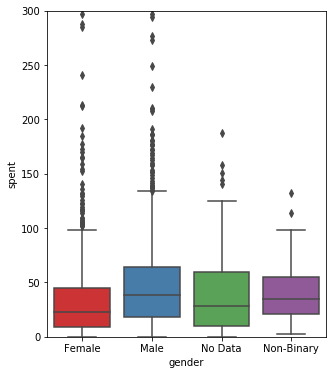

In [325]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5, 6))
sns.boxplot(x="gender", y="spent", data=time_df, palette="Set1", ax=ax)
ax.set_ylim([0, 300])
plt.show()

Небинарные подростки в своём большинстве тратят больше времени на просмотр аниме, чем все остальные

In [326]:
time_df['part'] = time_df['time']/time_df['age']

In [327]:
time_df.head()

,gender,age,spent,time,age_group,part
52,Female,17.4,284.76,11.3,"(12, 18]",0.649425
120,Male,13.8,11.55,2.7,"(12, 18]",0.195652
342,No Data,13.5,9.20,10.6,"(12, 18]",0.785185
652,Female,17.1,11.35,3.9,"(12, 18]",0.228070
836,Male,16.3,32.25,2.4,"(12, 18]",0.147239


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F50B199C88>,
      dtype=object)

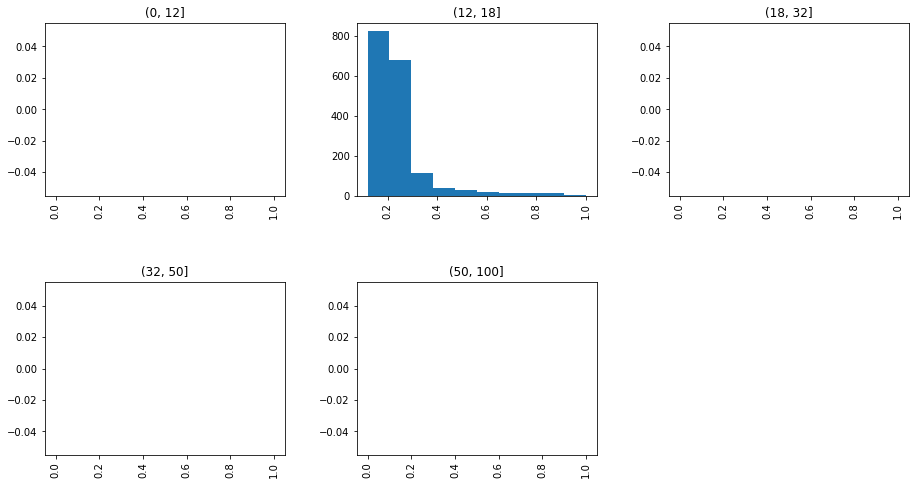

In [328]:
time_df.hist('part', by='age_group', layout=[2,3], figsize=[15,8])

Рост количества пользователей ресурса замедлился

In [329]:
gender_age_dict = {'gender':gender,'age':age}
gender_age_df = pd.DataFrame(time_dict,columns=['gender','age'])
gender_age_df.head()

,gender,age
0,Female,30.2
1,Female,25.5
2,Male,28.9
3,Male,29.5
5,Female,21.8


In [330]:
gender_age_df.to_csv('C:/Users/Alex/Desktop/gender_age_df.csv')

In [331]:
gender_dict = {'gender':gender}
gender_df = pd.DataFrame(time_dict,columns=['gender'])
gender_df.to_csv('C:/Users/Alex/Desktop/gender_df.csv')

In [332]:
age_dict = {'age':age}
age_df = pd.DataFrame(age_dict,columns=['age'])
age_df.round(0).astype(int).to_csv('C:/Users/Alex/Desktop/age_df.csv', index=False)

In [333]:
age_df.round(0).astype(int).head()

,age
0,30
1,26
2,29
3,30
4,22


In [334]:
users_df.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,8.27,1.0,10081.0
5,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,9.70,6.0,920.0


In [335]:
spent_df = users_df.user_days_spent_watching
days_in_vain_dict = {'spent':spent}
days_in_vain_df = pd.DataFrame(days_in_vain_dict,columns=['days'])
days_in_vain_df.round(0).astype(int).to_csv('C:/Users/Alex/Desktop/days_df.csv', index=False)

In [336]:
spent_df.round(0).astype(int).to_csv('C:/Users/Alex/Desktop/days_df.csv', index=False)

c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [337]:
print(users_df[users_df['gender'] == 'Male']['gender'].count())
print(users_df[users_df['gender'] == 'Female']['gender'].count())
print(users_df[users_df['gender'] == 'No Data']['gender'].count())
print(users_df[users_df['gender'] == 'Non-Binary']['gender'].count())

102801
57495
7648
801


In [338]:
anime_df = pd.read_csv('anime_filtered.csv')

In [339]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14474 entries, 0 to 14473
Data columns (total 31 columns):
anime_id          14474 non-null int64
title             14474 non-null object
title_english     5723 non-null object
title_japanese    14440 non-null object
title_synonyms    8936 non-null object
image_url         14378 non-null object
type              14474 non-null object
source            14474 non-null object
episodes          14474 non-null int64
status            14474 non-null object
airing            14474 non-null bool
aired_string      14474 non-null object
aired             14474 non-null object
duration          14474 non-null object
rating            14474 non-null object
score             14474 non-null float64
scored_by         14474 non-null int64
rank              12901 non-null float64
popularity        14474 non-null int64
members           14474 non-null int64
favorites         14474 non-null int64
background        1057 non-null object
premiered         40

In [340]:
title = anime_df['title']
rank = anime_df['rank']
scored_by = anime_df['scored_by']
pop_dict = {'title':title,'rank':rank, 'scored_by':scored_by}
pop_df = pd.DataFrame(pop_dict,columns=['title','rank','scored_by'])
pop_df.head()

,title,rank,scored_by
0,Inu x Boku SS,1274.0,139250
1,Seto no Hanayome,727.0,91206
2,Shugo Chara!! Doki,1508.0,37129
3,Princess Tutu,307.0,36501
4,Bakuman. 3rd Season,50.0,107767


In [341]:
pop_df.drop(pop_df[pop_df['rank']<1].index, inplace=True)
pop_df.drop(pop_df[pop_df['rank']>20].index, inplace=True)
pop_df.sort_values(by='rank', inplace=True)
pop_df.head()

,title,rank,scored_by
2555,Fullmetal Alchemist: Brotherhood,1.0,733592
1028,Kimi no Na wa.,2.0,471398
1252,Gintama°,3.0,71751
6177,Steins;Gate 0,4.0,26739
2999,Steins;Gate,5.0,563857


In [342]:
pop_df.to_csv('C:/Users/Alex/Desktop/pop_df.csv', index=False)

In [343]:
anime_df['type'].unique()

array(['TV', 'Movie', 'Music', 'OVA', 'ONA', 'Special', 'Unknown'],
      dtype=object)

In [344]:
print(anime_df[anime_df['type'] == 'TV']['type'].count())
print(anime_df[anime_df['type'] == 'Movie']['type'].count())
print(anime_df[anime_df['type'] == 'Music']['type'].count())
print(anime_df[anime_df['type'] == 'OVA']['type'].count())
print(anime_df[anime_df['type'] == 'ONA']['type'].count())
print(anime_df[anime_df['type'] == 'Special']['type'].count())
print(anime_df[anime_df['type'] == 'Unknown']['type'].count())

4271
2624
849
3608
1144
1948
30
